# Regression Analysis with Human Happiness Index

### Libraries Used for Analysis

In [1]:
import pandas as pa
import numpy as nu
import matplotlib.pyplot as plt
import seaborn as sea
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

### Reading the File

In [2]:
File = pa.read_csv('~/Downloads/2015.csv')

### Top 10 Details of the Data

Here, we using the first 10 data from the 2015 Human Happiness Index.

In [3]:
h = File.head(10)
print(h)

       Country                     Region  Happiness Rank  Happiness Score  \
0  Switzerland             Western Europe               1            7.587   
1      Iceland             Western Europe               2            7.561   
2      Denmark             Western Europe               3            7.527   
3       Norway             Western Europe               4            7.522   
4       Canada              North America               5            7.427   
5      Finland             Western Europe               6            7.406   
6  Netherlands             Western Europe               7            7.378   
7       Sweden             Western Europe               8            7.364   
8  New Zealand  Australia and New Zealand               9            7.286   
9    Australia  Australia and New Zealand              10            7.284   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884            

### Column Names of the Data 

In [4]:
print(h.columns)

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')


Here we using 4 column values for the analysis. Country, Happiness Rank, Happiness Score and Freedom.

In [5]:
col = h[['Country', 'Happiness Rank', 'Happiness Score', 'Freedom']]
print(col)

       Country  Happiness Rank  Happiness Score  Freedom
0  Switzerland               1            7.587  0.66557
1      Iceland               2            7.561  0.62877
2      Denmark               3            7.527  0.64938
3       Norway               4            7.522  0.66973
4       Canada               5            7.427  0.63297
5      Finland               6            7.406  0.64169
6  Netherlands               7            7.378  0.61576
7       Sweden               8            7.364  0.65980
8  New Zealand               9            7.286  0.63938
9    Australia              10            7.284  0.65124


### Description of Analysing Data

Using the description of the selected column valus for the values.

In [6]:
col.describe()

,Happiness Rank,Happiness Score,Freedom
count,10.00000,10.000000,10.000000
mean,5.50000,7.434200,0.645429
std,3.02765,0.110153,0.017048
min,1.00000,7.284000,0.615760
25%,3.25000,7.367500,0.634572
50%,5.50000,7.416500,0.645535
75%,7.75000,7.525750,0.657660
max,10.00000,7.587000,0.669730


### Visualization

Visualization about the selected column values. 

/home/sarath/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'Happiness Rank'}>,
        <AxesSubplot:title={'center':'Happiness Score'}>],
       [<AxesSubplot:title={'center':'Freedom'}>, <AxesSubplot:>]],
      dtype=object)

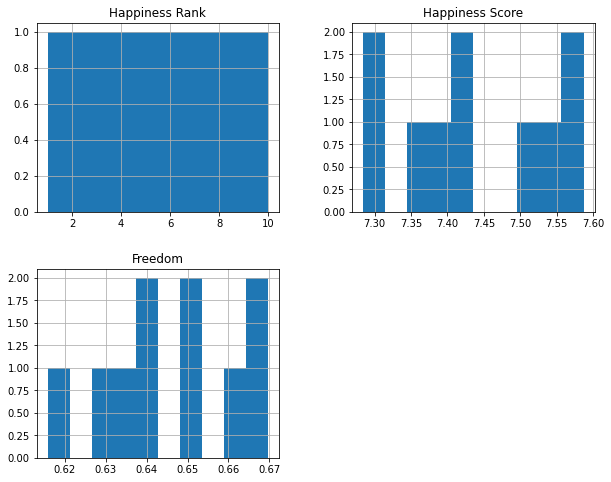

In [7]:
col.hist(figsize = (10,8))

Using selected column names for analysis.

In [8]:
col.columns

Index(['Country', 'Happiness Rank', 'Happiness Score', 'Freedom'], dtype='object')

### Distribution Plot of the Selected Column Values.

/home/sarath/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


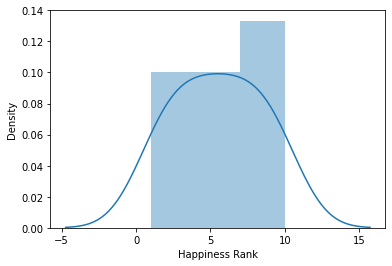

/home/sarath/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


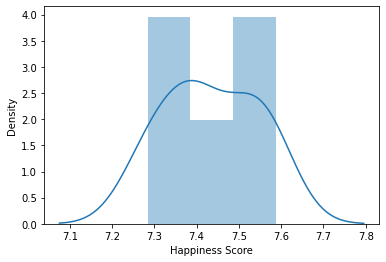

In [9]:
sea.distplot(col['Happiness Rank'])
plt.show()
sea.distplot(col['Happiness Score'])
plt.show()


### Barplot 

Using barplot to show Happiness score of top ten countries having

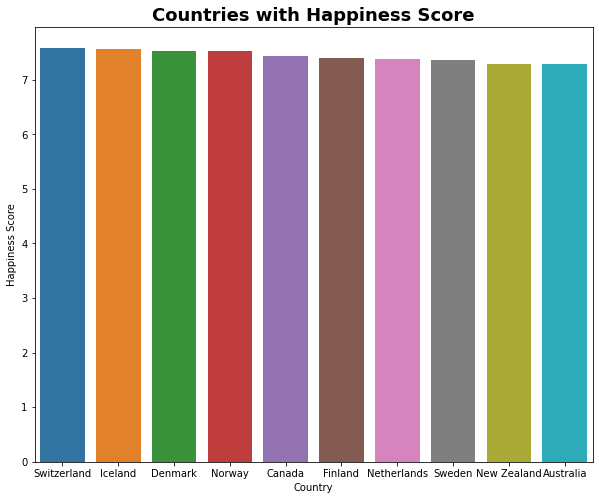

In [10]:
x = col['Country']
y = col['Happiness Score']
fig,ax = plt.subplots(figsize = (10, 8))
plot1 = sea.barplot(x = x, y = y)
plot1.set(xlabel = 'Country', ylabel = 'Happiness Score')
plot1.set_title('Countries with Happiness Score', fontdict = {'fontsize': 18, 'fontweight': 'bold'})
plt.show()

### Pairplot

Pairplot use to show the both distribution of single variable and relationships between two variables. Here, relationship between Happiness Rank (in x-axis), and Freedom and Happiness Score. Like Happiness Rank, second and third plot shows the relationship between Happiness Score (x-axis) , Freedom (x-axis) between Happiness Rank and Freedom.

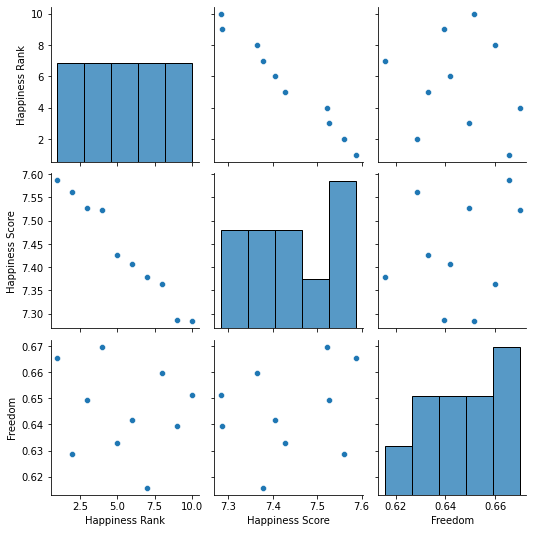

In [11]:
sea.pairplot(col)

### Scatter Plot

Scatter plot show the Freedom value in top 10 countries.

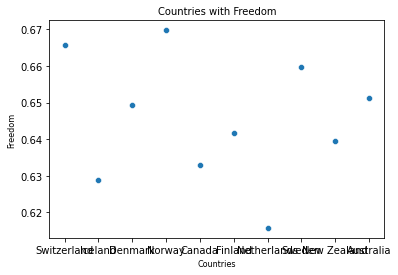

In [12]:
sea.scatterplot(x = col['Country'], y = col['Freedom'])
plt.title('Countries with Freedom', size = 10)
plt.xlabel('Countries', size = 8)
plt.ylabel('Freedom', size = 8)
plt.show()

### Regression Plot

Regression plot use the relationship between Freedom and Happiness Score.

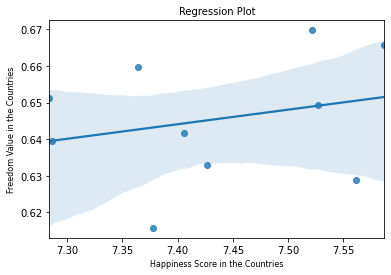

In [13]:
sea.regplot(x = col['Happiness Score'], y = col['Freedom'])
plt.title('Regression Plot', size = 10)
plt.xlabel('Happiness Score in the Countries', size = 8)
plt.ylabel('Freedom Value in the Countries', size = 8)
plt.show()

### Heatmap

Heatmap shows the relationships between the values itself and other values like Happiness Rank, Happiness Score and Freedom.

<AxesSubplot:>

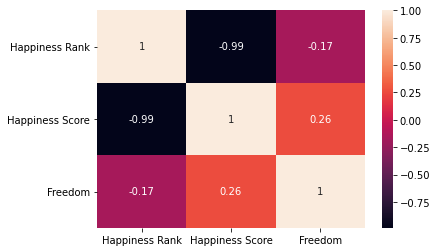

In [14]:
sea.heatmap(col.corr(), annot = True)

### Regression Analysis.

Taking the values from Happiness Score and Freedom column for regression analysis for to understand how the values are related.

In [15]:
x = col.iloc[:, 2:3]  # Taking 'Happiness Score' column
y = col.iloc[:, 3:4]  # Taking 'Freedom' column
#print(x.columns)
x1 = x['Happiness Score']
x1 =nu.array(x1)
print(x1)
y1 = y['Freedom']
y1 = nu.array(y1)
print(y1)
print(type(y1))


[7.587 7.561 7.527 7.522 7.427 7.406 7.378 7.364 7.286 7.284]
[0.66557 0.62877 0.64938 0.66973 0.63297 0.64169 0.61576 0.6598  0.63938
 0.65124]
<class 'numpy.ndarray'>


In [16]:
len(x1)
x1 = x1.reshape((10,1))
print(x1)
print(type(x1))

[[7.587]
 [7.561]
 [7.527]
 [7.522]
 [7.427]
 [7.406]
 [7.378]
 [7.364]
 [7.286]
 [7.284]]
<class 'numpy.ndarray'>


### Performing the Test

T-Test is checking the mean values (weights) of two samples taken selected from the data, for checking the relationship between two values. Here, the two values are Freedom and Happiness Score. 

#### Spliting

In [17]:
x_train, x_test, y_train,y_test = train_test_split(x1, y1, test_size = 0.4, random_state = 1)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1)

In [19]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7, 1)
(3, 1)
(7,)
(3,)


In [20]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size = 0.1)

In [21]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(9, 1)
(1, 1)
(9,)
(1,)


#### Mean Value

In [22]:
print(nu.mean(x_train))
print(nu.mean(x_test))
print(nu.mean(y_train))
print(nu.mean(y_test))

7.424444444444443
7.522
0.6427288888888889
0.66973


In [23]:
x_train,x_test,y_train, y_test = train_test_split(x1,y1,test_size = 3, random_state = 0)

In [24]:
print(nu.mean(x_train))
print(nu.mean(x_test))
print(nu.mean(y_train))
print(nu.mean(y_test))

7.443142857142857
7.413333333333333
0.6475085714285714
0.6405766666666667


In [25]:
l_r = LinearRegression()
l_r.fit(x_train, y_train)


LinearRegression()

In [26]:
Freedom_predict = l_r.predict(x_test)


In [27]:
column_file = pa.DataFrame({'Actual': y_test, 'Predicted Value': Freedom_predict})
print(column_file)
print('Mean Absolute Error',mean_absolute_error(y_test,Freedom_predict))

    Actual  Predicted Value
0  0.64938         0.650582
1  0.63938         0.641748
2  0.63297         0.646917
Mean Absolute Error 0.005839197108805538


Using the Regression plot for showing the variables (Happiness Score and Freedom), and how much they differ from the its degree of relation (mean absolute value).

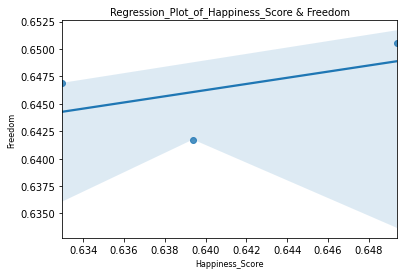

In [28]:
sea.regplot(x = y_test, y = Freedom_predict)
plt.title('Regression_Plot_of_Happiness_Score & Freedom', size = 10)
plt.ylabel('Freedom', size = 8)
plt.xlabel('Happiness_Score', size = 8)
plt.show()